### There are four main ways to handle missing values in time series data.
1. Imputation: forward fill and backward fill
2. Interpolation: linear interpolation, spline interpolation
3. Moving average: simple moving average, exponential moving average
4. Delete missing value section

### Caution: look-ahead bias
- When considering the application of the above methods,  
  be aware of the influence of look-ahead bias.
- Look-ahead bias refers to problems that occur  
  when future information is included in current or past analysis.
- If data with such biases is used for machine learning/deep learning,    
  the model's performance may be much lower than expected in reality.

### Missing value handling methods and look-ahead bias
- Backward fill(Imputation) and interpolation cause look-ahead bias.  
  However, the interpolation method has the advantage of handling missing values    
  by making good use of the graphical characteristics of the data,    
  so it can be used appropriately in situations where look-ahead bias is not a problem in analysis.
- In the case of moving averages, look-ahead bias can be avoided  
  by setting only data before missing values to be used.
- Forward fill(Imputation) has the advantage of not having a look-ahead bias problem,  
  having very simple calculations, and being easily applicable,  
  so it is often used as a missing value processing method for time series data.

### Applying missing value handling methods to simple sample data is as follows.

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from scipy.interpolate import interp1d
plt.rcParams['font.family'] = 'Malgun Gothic'
plt.rcParams['axes.unicode_minus'] = False

In [2]:
x = np.linspace(0, 1.5 * np.pi, 20) 
y = np.sin(x)

df_sample = pd.DataFrame({'x': x, 'y': y})

for i in range(11, 14):
    df_sample.at[i, 'y'] = np.nan

In [3]:
# forward fill
df_sample['ffill'] = df_sample['y'].fillna(method='ffill')  

# backward fill
df_sample['bfill'] = df_sample['y'].fillna(method='bfill')  

# linear interpolation
df_sample['linear'] = df_sample['y'].interpolate(method='linear')  

# spline interpolation
df_sample['spline'] = df_sample['y'].interpolate(method='spline', order=3) 

# simple moving average
df_sample['temp1'] = df_sample['y'].rolling(window=4, min_periods=1).mean()
df_sample['sma'] = df_sample['y'].fillna(df_sample['temp1'])

# Exponential Moving Average
df_sample['temp2'] = df_sample['y'].ewm(span=4, adjust=False).mean()
df_sample['ema'] = df_sample['y'].fillna(df_sample['temp2'])

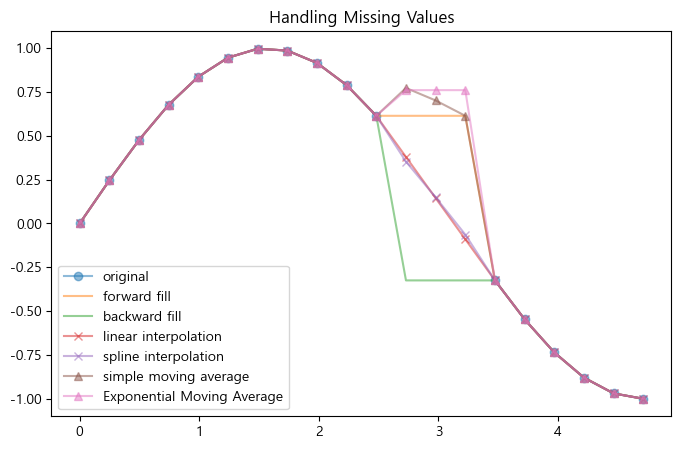

In [4]:
plt.figure(figsize=(8, 5))

plt.plot(df_sample['x'], df_sample['y'], marker='o', label='original', alpha=0.5)
plt.plot(df_sample['x'], df_sample['ffill'], label='forward fill', alpha=0.5)
plt.plot(df_sample['x'], df_sample['bfill'], label='backward fill', alpha=0.5)
plt.plot(df_sample['x'], df_sample['linear'], marker='x', label='linear interpolation', alpha=0.5)
plt.plot(df_sample['x'], df_sample['spline'], marker='x', label='spline interpolation', alpha=0.5)
plt.plot(df_sample['x'], df_sample['sma'], marker='^', label='simple moving average', alpha=0.5)
plt.plot(df_sample['x'], df_sample['ema'], marker='^', label='Exponential Moving Average', alpha=0.5)

plt.legend()
plt.title("Handling Missing Values")
plt.show()

### Method adopted in this analysis: forward fill
- I decided to compensate for missing values  
  based on the forward fill method to avoid look ahead bias.
- This is because after compensating for missing values in the data,  
  machine learning/deep learning will be used to create prediction model.

### Read file
- The data to be worked on is downsampled from the raw data on a weekly basis.
- raw data name : Corn, Oat, Cereals & Grains Futures Data    
  (Historical data on Cereals and Grains Futures from Yahoo Finance)
- raw data source : kaggle datasets  
  (https://www.kaggle.com/datasets/guillemservera/grains-and-cereals-futures)

In [5]:
df = pd.read_csv('./data/grain_prices/all_grains_data_week.csv',
                sep=',', encoding='utf-8')

In [6]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7305 entries, 0 to 7304
Data columns (total 7 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   week_last_date  7305 non-null   object 
 1   commodity       7305 non-null   object 
 2   open            7268 non-null   float64
 3   high            7268 non-null   float64
 4   low             7268 non-null   float64
 5   close           7268 non-null   float64
 6   volume          7305 non-null   int64  
dtypes: float64(4), int64(1), object(2)
memory usage: 399.6+ KB


In [7]:
df['week_last_date'] = pd.to_datetime(df['week_last_date'])

In [8]:
print(df['open'].isnull().sum())

df[df['open'].isnull()]

37


,week_last_date,commodity,open,high,low,close,volume
21,2000-12-17,Corn,NaN,NaN,NaN,NaN,0
25,2001-01-14,Corn,NaN,NaN,NaN,NaN,0
2444,2000-09-24,Oat,NaN,NaN,NaN,NaN,0
2445,2000-10-01,Oat,NaN,NaN,NaN,NaN,0
2446,2000-10-08,Oat,NaN,NaN,NaN,NaN,0
2447,2000-10-15,Oat,NaN,NaN,NaN,NaN,0
2448,2000-10-22,Oat,NaN,NaN,NaN,NaN,0
2449,2000-10-29,Oat,NaN,NaN,NaN,NaN,0
2450,2000-11-05,Oat,NaN,NaN,NaN,NaN,0
2451,2000-11-12,Oat,NaN,NaN,NaN,NaN,0


### forward fill

In [9]:
df = df.sort_values(by=['commodity', 'week_last_date'])

df1 = df.groupby('commodity').apply(lambda group: group.interpolate(method='ffill'))\
    .drop('commodity', axis=1).reset_index(level='commodity')

In [10]:
df1.info()

<class 'pandas.core.frame.DataFrame'>
Index: 7305 entries, 0 to 7304
Data columns (total 7 columns):
 #   Column          Non-Null Count  Dtype         
---  ------          --------------  -----         
 0   commodity       7305 non-null   object        
 1   week_last_date  7305 non-null   datetime64[ns]
 2   open            7305 non-null   float64       
 3   high            7305 non-null   float64       
 4   low             7305 non-null   float64       
 5   close           7305 non-null   float64       
 6   volume          7305 non-null   int64         
dtypes: datetime64[ns](1), float64(4), int64(1), object(1)
memory usage: 456.6+ KB


In [11]:
df1['commodity'].value_counts()

commodity
Oat             1236
Rough Rice      1236
Soybean Oil     1226
Corn            1208
Soybean         1200
KC HRW Wheat    1199
Name: count, dtype: int64

### Unify the data period for each commodity
- Check the data collection start date for each commodity  
  and delete data before the latest date.

In [12]:
collect_period = df1.groupby('commodity')['week_last_date'].min()
collect_period.max()

Timestamp('2000-09-24 00:00:00')

In [13]:
df2 = df1[df1['week_last_date'] >= '2000-09-24']

print(df1.shape)
print(df2.shape)

(7305, 7)
(7194, 7)


In [14]:
df2['commodity'].value_counts()

commodity
Corn            1199
KC HRW Wheat    1199
Oat             1199
Rough Rice      1199
Soybean         1199
Soybean Oil     1199
Name: count, dtype: int64

In [15]:
df2.head()

,commodity,week_last_date,open,high,low,close,volume
9,Corn,2000-09-24,185.6000,185.6000,185.5500,184.5000,30
10,Corn,2000-10-01,189.0000,189.0000,189.0000,189.8500,15
11,Corn,2000-10-08,190.0000,190.0000,190.0000,197.3500,15
12,Corn,2000-10-15,190.0000,190.0000,190.0000,200.2500,15
13,Corn,2000-10-22,199.9375,199.9375,199.9375,203.0625,16


### Missing values were well cleaned

In [16]:
df2.info()

<class 'pandas.core.frame.DataFrame'>
Index: 7194 entries, 9 to 7304
Data columns (total 7 columns):
 #   Column          Non-Null Count  Dtype         
---  ------          --------------  -----         
 0   commodity       7194 non-null   object        
 1   week_last_date  7194 non-null   datetime64[ns]
 2   open            7194 non-null   float64       
 3   high            7194 non-null   float64       
 4   low             7194 non-null   float64       
 5   close           7194 non-null   float64       
 6   volume          7194 non-null   int64         
dtypes: datetime64[ns](1), float64(4), int64(1), object(1)
memory usage: 449.6+ KB


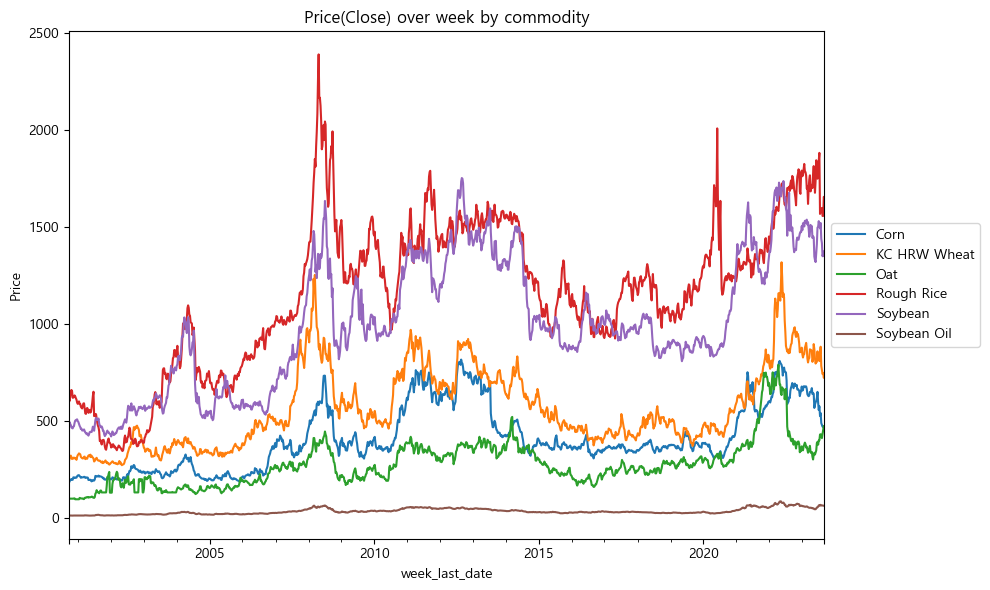

In [17]:
pivot_df = df2.pivot(index='week_last_date', columns='commodity', values='close')

ax = pivot_df.plot(figsize=(10, 6))

ax.set_title('Price(Close) over week by commodity')
ax.set_ylabel('Price')
ax.set_xlabel('week_last_date')
ax.legend(loc='center left', bbox_to_anchor=(1, 0.5))
plt.tight_layout()

plt.show()